<a href="https://colab.research.google.com/github/YinhaoHe/Python-AI-teaching/blob/master/Iris_Clustering_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
df.columns = ["sepal length", "sepal width",'petal length', 'pedal width', 'species']
df

,sepal length,sepal width,petal length,pedal width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


In [ ]:
#Separate the species column.
#Replace Iris-setosa with 0, versicolor with 1, and virginica with 2
df = df.replace("Iris-setosa",0)
df = df.replace("Iris-veriscolor",1)
df = df.replace("Iris-virginica",2)
y = df["species"]

df = df.drop("species", axis = 1)
y

,sepal length,sepal width,petal length,pedal width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4
5,4.6,3.4,1.4,0.3
6,5.0,3.4,1.5,0.2
7,4.4,2.9,1.4,0.2
8,4.9,3.1,1.5,0.1
9,5.4,3.7,1.5,0.2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faed222bb00>,
      dtype=object)

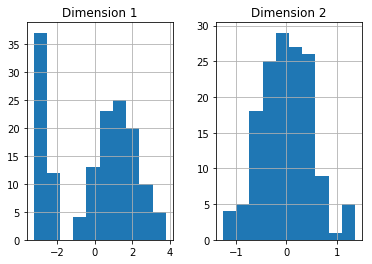

In [ ]:
#Run PCA with 2 components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df)

reduced_df = pca.transform(df)
reduced_df = pd.DataFrame(reduced_df, columns = ['Dimension 1', 'Dimension 2'])

reduced_df.hist()

In [ ]:
#Do Kmeans
#Find the best number of clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2,11))

# Loop through clusters
for n_clusters in range_n_clusters:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=n_clusters).fit(reduced_df)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_df)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_df, preds, metric='euclidean')
    print("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))

For n_clusters = 2. The average silhouette_score is : 0.7039223905634084
For n_clusters = 3. The average silhouette_score is : 0.5954306866307435
For n_clusters = 4. The average silhouette_score is : 0.5566660832997331
For n_clusters = 5. The average silhouette_score is : 0.5484775622975321
For n_clusters = 6. The average silhouette_score is : 0.4481386777826948
For n_clusters = 7. The average silhouette_score is : 0.4459583420297569
For n_clusters = 8. The average silhouette_score is : 0.44724759524554003
For n_clusters = 9. The average silhouette_score is : 0.44396976557073387
For n_clusters = 10. The average silhouette_score is : 0.4134050618430269


In [ ]:
  clusterer = KMeans(n_clusters=3).fit(reduced_df)
  preds = clusterer.predict(reduced_df)


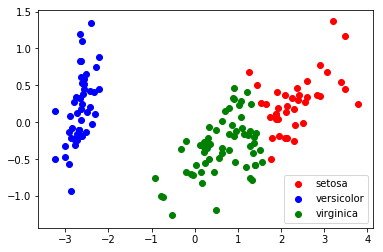

In [ ]:
d1 = reduced_df[preds == 0]
d2 = reduced_df[preds == 1]

plt.scatter(d1["Dimension 1"], d1["Dimension 2"], c="red")
plt.scatter(d2["Dimension 1"], d2["Dimension 2"], c="blue")

plt.legend()

***Plot the actual clusters***<br>
how do your predictions compare?

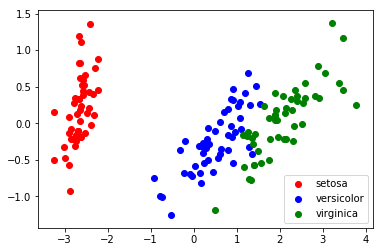

In [ ]:
d1 = reduced_df[y == 0]
d2 = reduced_df[y == 1]
d3 = reduced_df[y == 2]

plt.scatter(d1["Dimension 1"], d1["Dimension 2"], c="red", label = "setosa")
plt.scatter(d2["Dimension 1"], d2["Dimension 2"], c="blue", label = "versicolor")
plt.scatter(d3["Dimension 1"], d3["Dimension 2"], c="green", label = "virginica")

plt.legend()

***REDO THE PROBLEM WITH THE GAUSSIAN MIXTURE MODEL***<br>
How do the results compare?

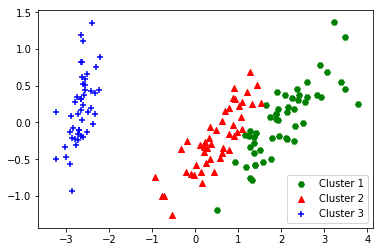

In [ ]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=3,covariance_type="full")
gmm.fit(reduced_df)
preds = gmm.predict(reduced_df)
c1 = reduced_df[preds == 0]
c2 = reduced_df[preds == 1]
c3 = reduced_df[preds == 2]

plt.scatter(c1["Dimension 1"], c1["Dimension 2"], color = "green", label="Cluster 1", marker="H")
plt.scatter(c2["Dimension 1"], c2["Dimension 2"], color = "red", label="Cluster 2", marker="^")
plt.scatter(c3["Dimension 1"], c3["Dimension 2"], color = "b", label="Cluster 3", marker="+")

plt.legend()